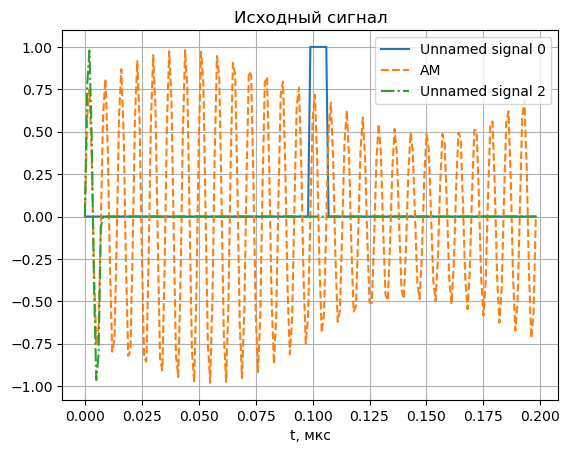

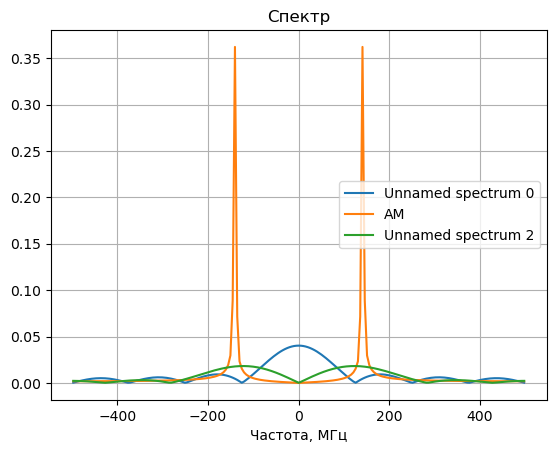

In [1]:
# Лабораторная работа №3
# Задача - сформировать сигналы и выполнить их фильтрацию
# Дополнить код реализациями полосового и заградительного фильтров
# Формирование сигнала
# %%
# Инициализация
import numpy as np
import math
from toolbox import *


f_d = 1e9              # частота дискретизации, Гц
t_d = 1/f_d            # период дискретизации
t_win = 2e-7           # длительность рассматриваемого интервала
t_ch = 8e-9            # длительность импульса (t chirp)
f_car = 140e6          # частота несущей, Гц

f_mod = 5e6 
i_mod = 0.5   # параметры модуляции (частота)

# Формирование сигналов
s_v = generate_single_chip('video', t_d, t_win, t_ch)                 # в/импульс
s_r = generate_single_chip('radio', t_d, t_win, t_ch, f_car)          # р/импульс
s_am = generate_single_chip('AM', t_d, t_win, f_car, f_mod, i_mod)    # АМ сигнал

# Отображение данных
signal = np.roll(s_v, math.floor(len(s_r)/2)) # выбрать сигнал для отображения
  
plot_signal([[t_d, signal],
             [t_d, s_am, 'AM'],
             [t_d, s_r]])     # отобразить сигнал
plot_spectum([[t_d, signal],
              [t_d, s_am, 'АМ'],
              [t_d, s_r]])   # отобразить спектр сигнала



d:\Anaconda\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


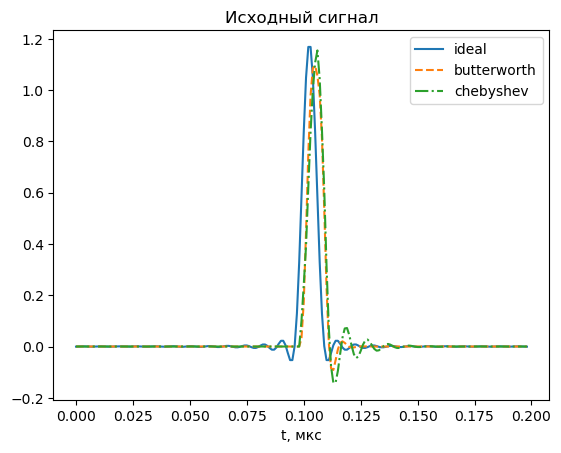

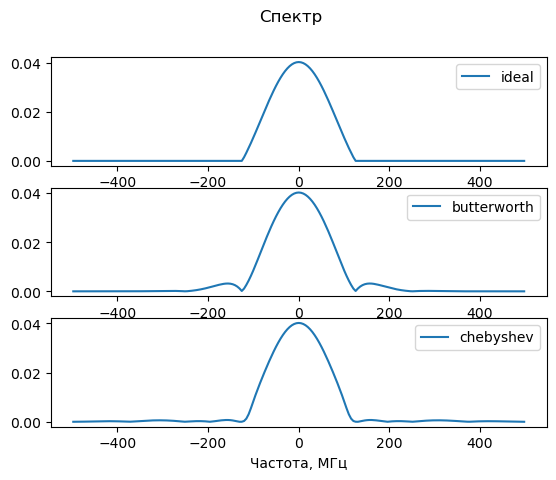

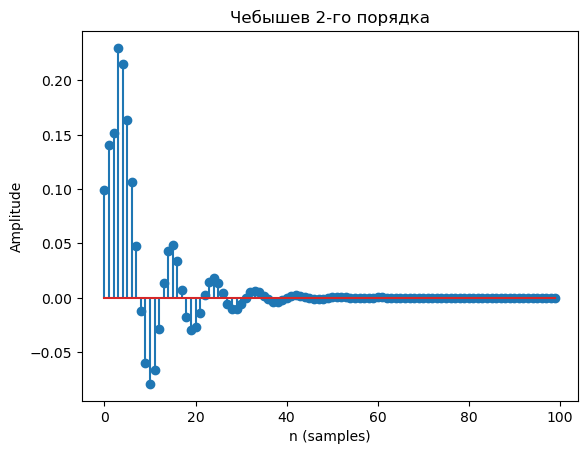

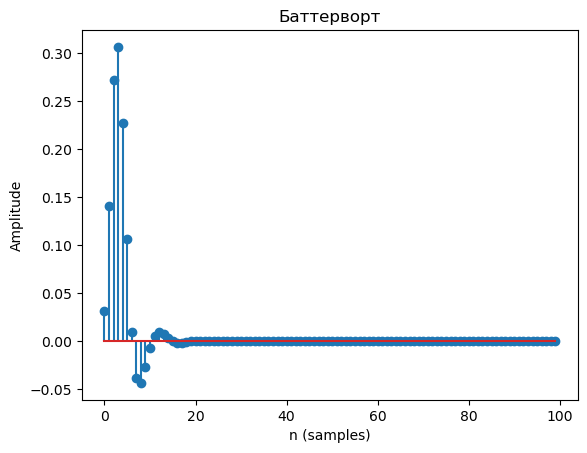

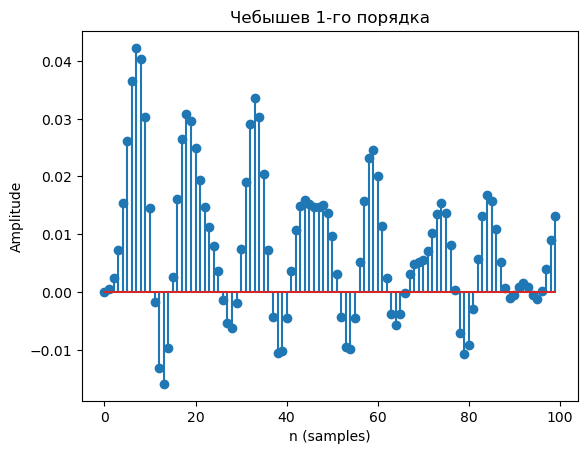

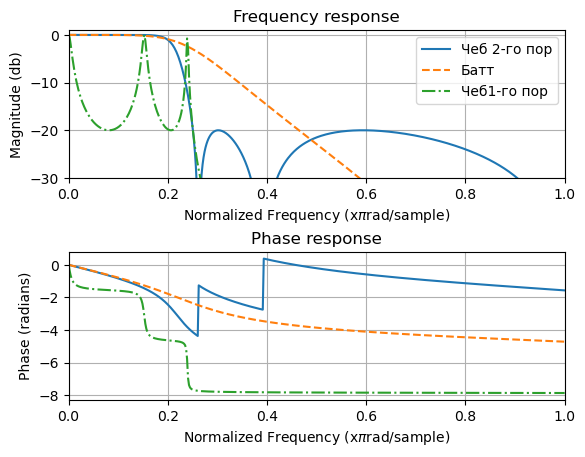

In [2]:
# Сравнение фильтров
# идеальный КИХ фильтр
signal_in = signal     # выбрать сигнал для дальнейшей обработки
f_type = 'LP'          # тип фильтра (LP/HP/BP/S)
f_cut_hz = 1/t_ch      # частота среза, Гц
but_order = 3  
cheb_order = 5 # порядок фильтров
s_band_attenuation_db = 20     # внеполосное ослабление лепестков для фильтра Чебышева

signal_out_idl = apply_ideal_filter(t_d, f_type, f_cut_hz, signal_in)              # идеальный ф.
signal_out_btr = apply_butt_filter(t_d, f_type, f_cut_hz, but_order, signal_in)    # ф. Баттерворта
signal_out_chb = apply_cheb2_filter(t_d, f_type, f_cut_hz, cheb_order, s_band_attenuation_db, signal_in)   # ф. Чебышева

# Отображение данных
signal_out = [[t_d, signal_out_idl, 'ideal'],
              [t_d, signal_out_btr, 'butterworth'], 
              [t_d, signal_out_chb, 'chebyshev']]  # конкатенация рез-татов фильтрации
plot_signal(signal_out)                 # отобразить фильтрованные сигналы
plot_spectum(signal_out)       # отобразить спектр (ф-я возвращает указатель на объект)

# Вывод АЧХ и ФЧХ
b_cheb2, a_cheb2 = create_cheb2_filter(t_d, f_type, f_cut_hz, cheb_order, s_band_attenuation_db)      # формирование фильтра Чебышего 2-го порядка
b_butt, a_butt = create_butt_filter(t_d, f_type, f_cut_hz, but_order)      # формирование фильтра Баттерворта
b_cheb1, a_cheb1 = create_cheb1_filter(t_d, f_type, f_cut_hz, cheb_order, s_band_attenuation_db)      # формирование фильтра Чебышего 1-го порядка
n_imp_resp = 2^7   # длительность интервала (в отсчетах) для которого строится имп. характеристика
n_freq_resp = 2^10  # число отсчетов АЧХ и ФЧХ

b = [b_cheb2, b_butt, b_cheb1]
a = [a_cheb2, a_butt, a_cheb1]
legend_filters = ['Чеб 2-го пор', 'Батт', 'Чеб1-го пор']
   
impz(b_cheb2,a_cheb2, 'Чебышев 2-го порядка')
impz(b_butt,a_butt, 'Баттерворт')
impz(b_cheb1,a_cheb1, 'Чебышев 1-го порядка')

mfreqz3(b, a, legend_filters)